### Importing Essential Libraries

In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from scipy.stats import zscore
sns.set(color_codes=True) 
%matplotlib inline


### Reading the csv file

In [56]:
hr_df = pd.read_csv("attrition.csv")

### Check the top few records and the dimensions of the dataset

In [57]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [58]:
hr_df.shape

(1470, 35)

In [59]:
hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [60]:
hr_df.isnull().sum()
#Our dataset is not having any missing values, so we can proceed

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

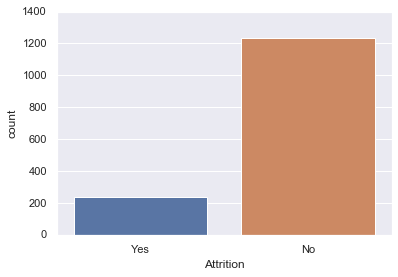

In [61]:
#Let's see graphically how many employees are actually leaving the company
sns.countplot(x ='Attrition', data = hr_df)

In [62]:
#Now, as we can see in the dataset, there are a few columns which we do not need and their presence might alter our results.
#1. Employee Count(All the fields have the same value)
#2. Employee Number(It is Employee Identification number and does not have any significance in our analysis)
#3. Standard Hours(All the fields have the same value)
#4. Over 18(All the fields have the same value)

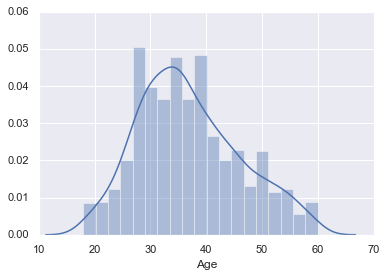

In [63]:
#Agewise Distribution of Employees
sns.distplot(hr_df['Age'])
plt.show() 

Text(0.5, 1.0, 'Job Role')

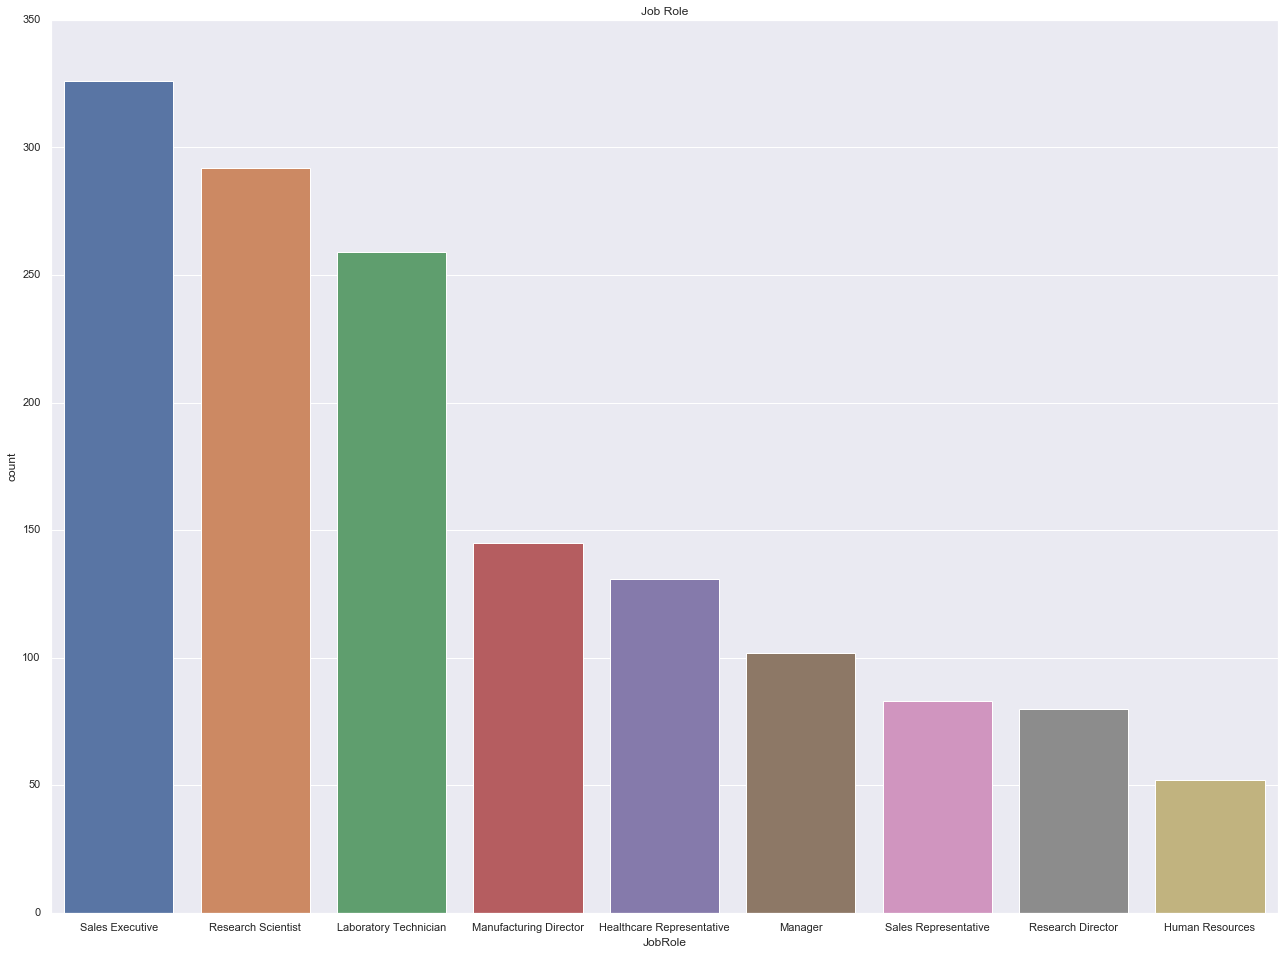

In [64]:
#Job role wise distribution of employees
sns.countplot(hr_df['JobRole'])
fig = plt.gcf()
fig.set_size_inches(22,16)
plt.title('Job Role')

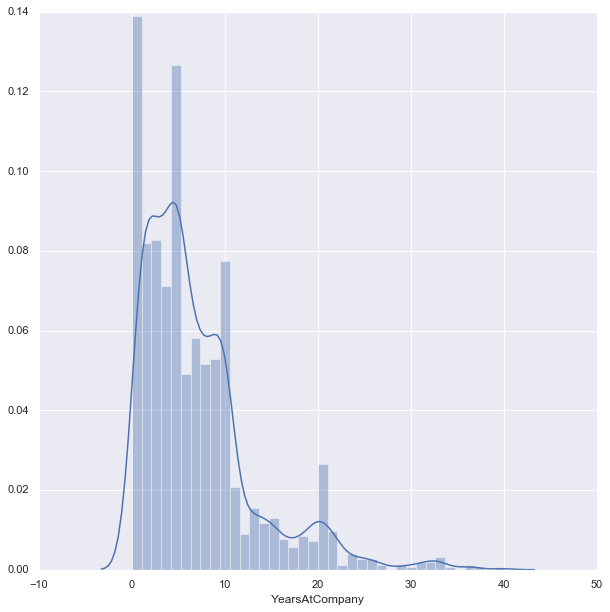

In [65]:
# Let's see graphically how many years people work at IBM
sns.distplot(hr_df['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)

In [66]:
hr_df['YearsAtCompany'].describe()
#So, on an average, employees work here for 7 years. Also, Median working years is 5 years

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

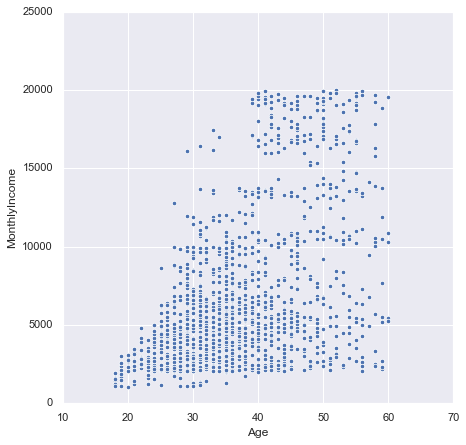

In [67]:
sns.scatterplot(x='Age',y='MonthlyIncome',data=hr_df)
fig = plt.gcf()
fig.set_size_inches(7,7)

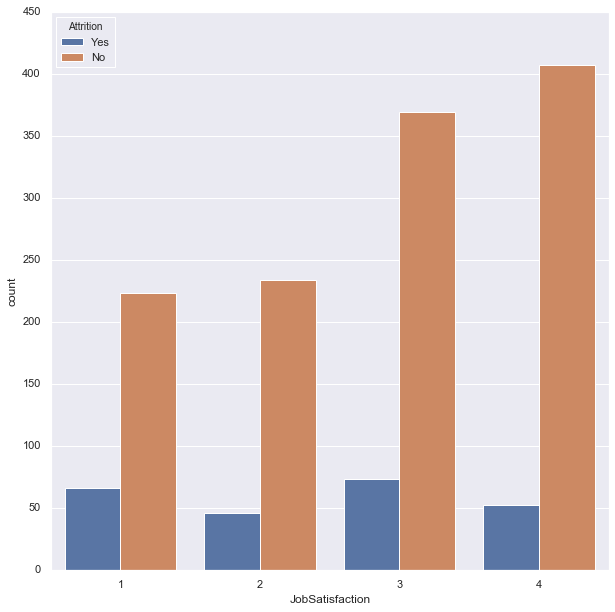

In [68]:
sns.countplot(data=hr_df,x= "JobSatisfaction",hue="Attrition")
fig = plt.gcf()
fig.set_size_inches(10,10)

**It is evident that the employees which are not satisfied with the job are likely to leave. Hence, this is going to be a strong predictor for us**

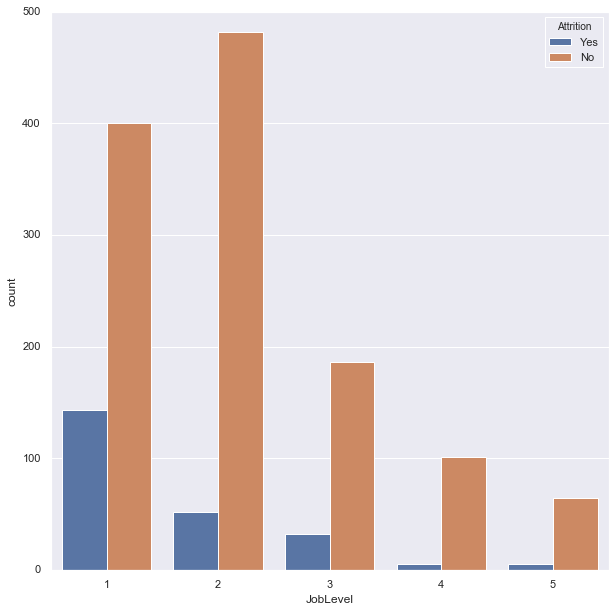

In [69]:
sns.countplot(data=hr_df,x= "JobLevel",hue="Attrition")
fig = plt.gcf()
fig.set_size_inches(10,10)

**Employeees with Job Level 1 are more likely to leave as compared to the ones with Job Level 5. This is not a very strong predictor but it is an informative insight that the company should focus more on retaining the lower level employees**

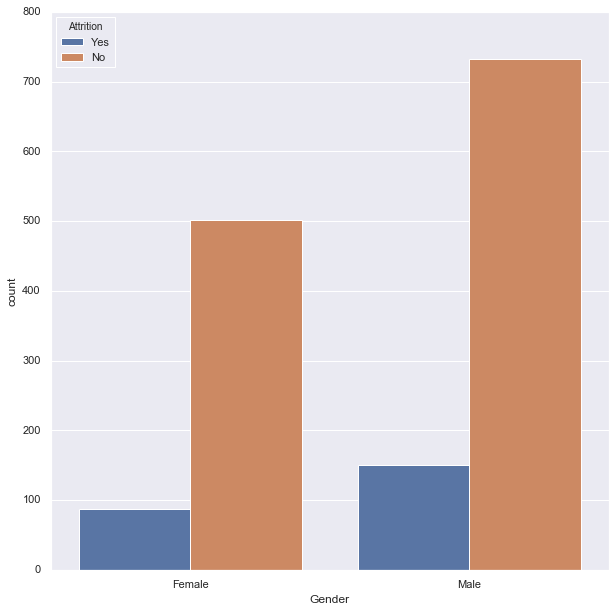

In [70]:
sns.countplot(data=hr_df,x= "Gender",hue="Attrition")
fig = plt.gcf()
fig.set_size_inches(10,10)
#Here, we can see that males are more likely to leave than the females

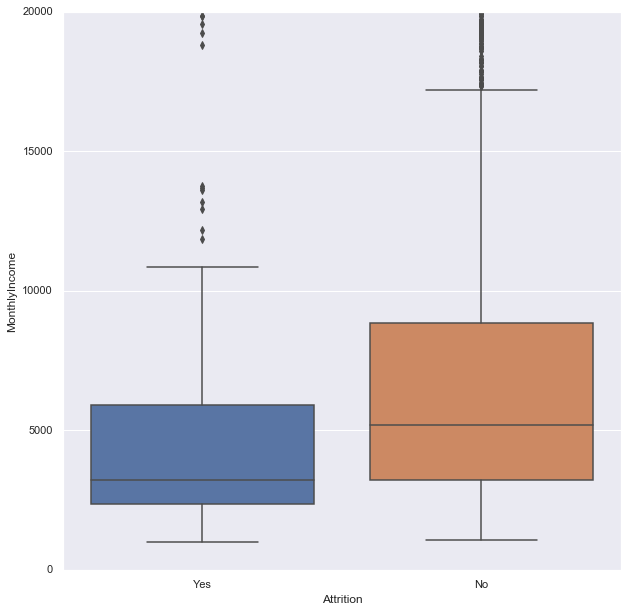

In [71]:
sns.boxplot(hr_df['Attrition'], hr_df['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

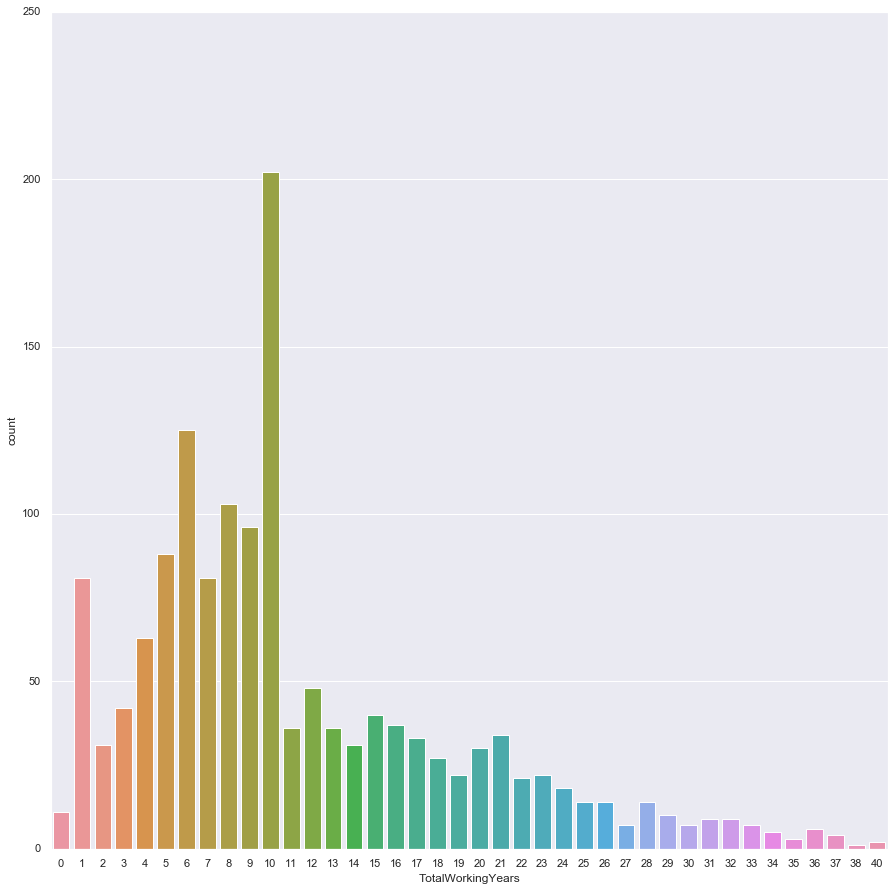

In [72]:
# Distribution of total working years
sns.countplot(hr_df.TotalWorkingYears)
fig = plt.gcf()
fig.set_size_inches(15,15)

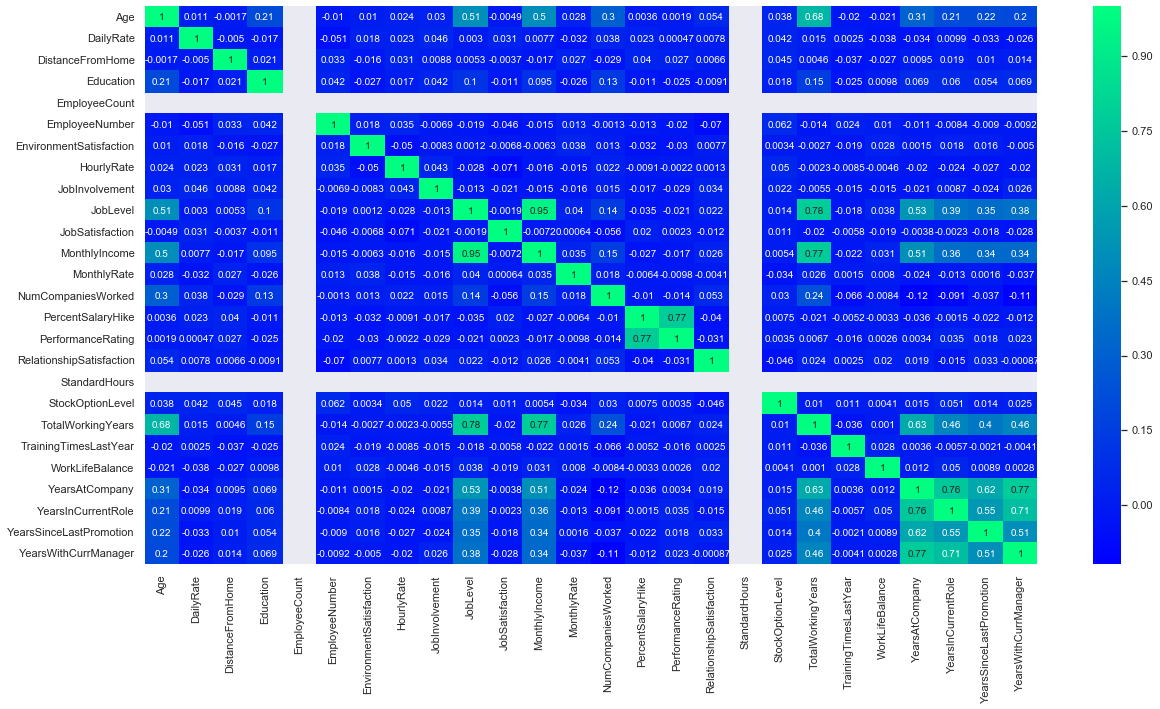

In [73]:
#Let's see how various variables are correlated with each other
plt.figure(figsize=(20,10))
sns.heatmap(hr_df.corr(),annot=True, cmap='winter')

**Here, we can see that some variables are highly correlated. For example, Job level isshighly correlated with monthly income. Again, job level is highly correlated with Total working years. There are other set of variables as well which we can see are highly correlated**

In [74]:
#Let's drop the useless columns which have only on unique value present in them
hr_df.drop(columns=['Over18','StandardHours','EmployeeCount'],inplace=True)

In [75]:
#Encoding of Attrition column into two classes. This is our target variable
hr_df['Attrition']=hr_df['Attrition'].map({'Yes':1, 'No':0})

In [84]:
#Seperation of categorical columns
cat_col = hr_df.select_dtypes(exclude=[np.number])
cat_col

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [80]:
#Extracting the numerical columns
num_col = hr_df.select_dtypes(include=[np.number])
num_col

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,2062,4,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2064,2,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,2065,4,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [86]:
#Creating the target variable
y=num_col['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [100]:
#Removing the columns which are correlated and keeping only the important columns
num_col=num_col[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']]
num_col.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [93]:
cat_col = pd.get_dummies(cat_col)
cat_col.head()
##############################

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [101]:
x = pd.concat([num_col, cat_col], axis=1)
x.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,3,61,2,2,2,4,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,4,92,2,1,3,2,0,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,40,3,1,2,4,1,...,0,0,0,0,0,0,1,0,1,0


### Using the Decision Tree Classifier

**Since we are using the Decision Tree Model, we do not require to scale the data or treat the outliers as the DT Model is immune to outliers. Also, scaling is required in Eucledian Models and Decision Tree is not one of the Euclidean Model.This is the main reason that we are using this model.**

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
pred= model.predict(x_test)

In [124]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       374
           1       0.40      0.40      0.40        67

    accuracy                           0.82       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.82      0.82      0.82       441



In [125]:
print(confusion_matrix(y_test,pred))

[[334  40]
 [ 40  27]]


**We have an accuracy score of 81%. Let us try to tune the hyperparemeters using Randomised Search CV method and see if we can improve the accuracy of the model**

### Hyperparameter Tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV
params={"criterion":("gini", "entropy"),"splitter":("best", "random"), "max_depth":(list(range(1, 20))), "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1, 20))}

In [133]:
import warnings
warnings.filterwarnings('ignore')
rt= RandomizedSearchCV(model,params,n_iter=100,n_jobs=-1,cv=3,verbose=2)
rt.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=8,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=6,
                                                    min_samples_split=4,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [137]:
rt.best_estimator_
model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [138]:
#Printing the classification Report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       374
           1       0.50      0.37      0.43        67

    accuracy                           0.85       441
   macro avg       0.70      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



In [139]:
#let's have a look at our confusion matrix
print(confusion_matrix(y_test,pred))

[[349  25]
 [ 42  25]]


In [140]:
#Cross validation of our results
from sklearn.model_selection import cross_validate
cv = cross_validate(model, x, y, cv=200)
print(cv['test_score'].mean())

0.8516964285714286


**By tuning the hyperparameters, we have improved our accuracy score by 4%**

In [141]:
#Saving our model
from sklearn.externals import joblib
joblib.dump(model,'HRAnalyticsProj.csv')

['HRAnalyticsProj.csv']

In [142]:
#Loading the model
model=joblib.load('HRAnalyticsProj.csv')

In [143]:
#Predicting using the model
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,